
# Workshop 3: Elementary ML Models / Workshop 3: Elementární ML modely

## 1. Statistics - How We Measure the World Using Random Variables / Statistika - Jak pomocí náhodných veličin měříme svět

**Random Variables**: Definition and examples (e.g., number of pips when rolling a die, temperature measured at a specific location at the same hour on different days).
**Náhodné veličiny**: Definice a příklady (např. počet ok při vrhu kostkou, teplota naměřená na určitém místě ve stejnou hodinu v různých dnech).

**Probability Distributions**: Discrete and continuous random variables.
**Rozdělení pravděpodobnosti**: Diskrétní a spojité náhodné veličiny.

**Mean and Variance**: Basic characteristics of random variables.
**Střední hodnota a rozptyl**: Základní charakteristiky náhodných veličin.


### Example/Příklad:
**Number of Seasons Played:** 
The histogram shows the distribution of the number of seasons played by players, which follows a log-normal distribution clipped between 0 and 20. 

**Počet odehraných sezón:**
Histogram ukazuje rozdělení počtu odehraných sezón hráči, které následuje lognormální rozdělení oříznuté mezi 0 a 20.

**Player Height:**
The histogram shows the distribution of player heights, which follows a normal distribution with a mean of 175 cm and a standard deviation of 10 cm. 

**Výška hráče:** 
Histogram ukazuje rozdělení výšky hráčů, které následuje normální rozdělení s průměrnou výškou 175 cm a standardní odchylkou 10 cm.

[ 5  4  6  9  3  3  9  6  3  5  3  3  5  1  1  3  2  5  2  2  9  4  4  2
  3  4  2  5  3  3  3 11  4  2  6  2  4  1  2  4  6  4  4  3  2  3  3  7
  5  1  5  3  3  6  7  7  2  3  5  7  3  4  2  2  6  8  4  7  5  3  5  9
  4  9  1  6  4  3  4  1  4  5  9  3  2  3  7  5  3  5  4  7  3  3  3  2
  5  5  4  3  2  3  3  3  4  5 11  4  5  4  1  4  4 15  4  5  4  2  7  6
  6  2  9  2  6 13  2  3  4  3  2  4  2  5  2  9  3  3  6  2  5  8  2  4
  5  6  2  2  5  5  5  5  3  5  5  3 11  5  2  6  2  6  7  2  7  5  6 11
  3  3  2  2  4  5  5  6  4  9  3 17  6  2  2  5  4  6  5  4  2  2  3  6
  4  2  4  5  2  4  4  2  5  5  7  7  2  2  5  5  5 20  5  7  7  6  3  6
  3  3  3  4 14  1  6  2  3  7  4  2  3  6  3  4  4  3 13  6  1  4  3  6
  3  4  5  6  2  3  3  3 10  5  2  7 12  7  2  3  8  3  5  6  2  4  0  2
  3  2 10  2  3  4  9  2  8  4  2  5  4  3  4  3  4  6  9  2 13  1  4  6
  5  3  4  3  3  6  5  3  7  5  6  6  2  3  6  6  4  4  8  3  5  4  4  7
  6  6  8  4  6  3  5  4  4  6  2 12  2  2  7  6  6

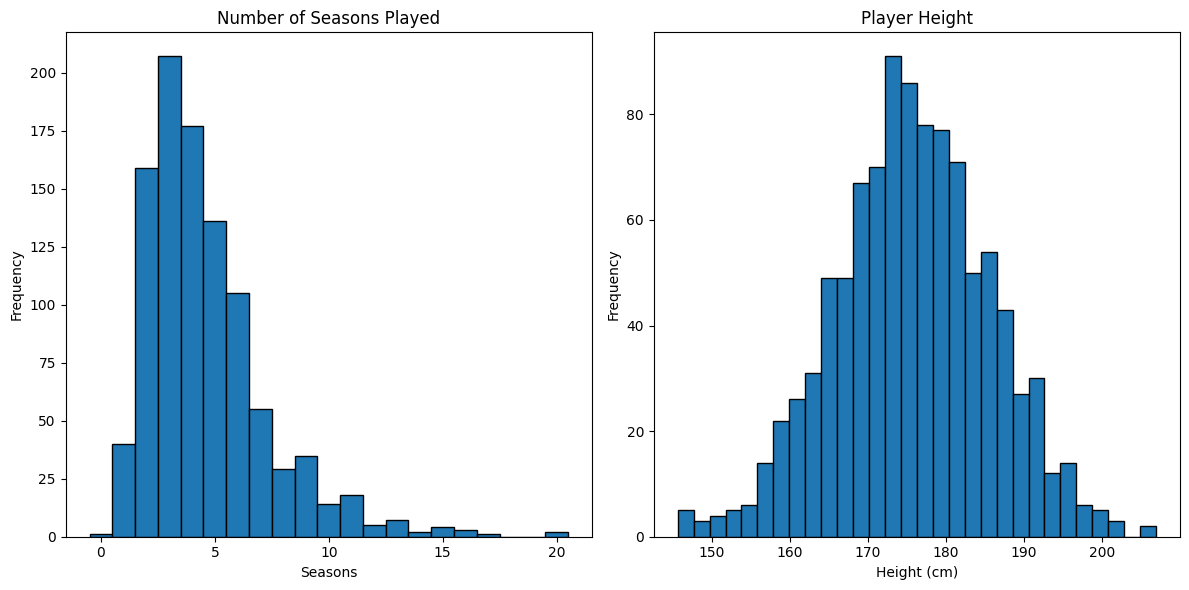

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate discrete random variable: number of seasons played (log-normal distribution)
num_seasons = np.random.lognormal(mean=1.5, sigma=0.5, size=1000).astype(int)
num_seasons = np.clip(num_seasons, 0, 20)  # Clip values to be between 0 and 20
print(num_seasons)

# Generate continuous random variable: player height (normal distribution)
player_height = np.random.normal(loc=175, scale=10, size=1000)  # Mean height 175 cm, standard deviation 10 cm
print(player_height)

# Plot histogram for number of seasons played
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(num_seasons, bins=np.arange(0, 22) - 0.5, edgecolor='black')
plt.title('Number of Seasons Played')
plt.xlabel('Seasons')
plt.ylabel('Frequency')

# Plot histogram for player height
plt.subplot(1, 2, 2)
plt.hist(player_height, bins=30, edgecolor='black')
plt.title('Player Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

# Show plots
plt.tight_layout()
plt.show()



## 2. Basic Models - Regression (Linear and Logistic) or Decision Trees / Základní modely - Regrese (lineární a logistická) nebo rozhodovací stromy

**Linear Regression**: Dependence of the explained variable on one or more regressors.
**Lineární regrese**: Závislost vysvětlované proměnné na jednom nebo více regresorech.

**Logistic Regression**: Used for binary classification.
**Logistická regrese**: Použití pro binární klasifikaci.

**Decision Trees**: Structure and basic principles.
**Rozhodovací stromy**: Struktura a základní principy.


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression

df_players = pd.read_csv('data_players.csv')  # Assuming you have a CSV file with player data

df_players[ df_players['aktivni'] == False ]
#df_players['aktivni'] == False


,jmeno,pozice,aktivni,uspesnost_strel,pohlavi,vek,klub,vyska,vaha,doba_herni_aktivity,obrazek,rychlost_pohybu,nejcastejsi_pozice,obrazek_yolo,poznamky
3,Hrac 4,Záložník,False,0.49,Žena,35,Chodsko,166,60,2,hrac_4.jpg,7.261354,"(63.945806829894956, 71.57819336136397, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
5,Hrac 6,Obránce,False,0.87,Muž,27,AC Ostrava,198,86,19,hrac_6.jpg,6.908319,"(16.275442446045275, 66.96425665307179, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
7,Hrac 8,Záložník,False,0.83,Muž,19,Liberec,190,75,8,hrac_8.jpg,6.196267,"(24.40894848330274, 59.861017304532695, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
8,Hrac 9,Útočník,False,0.71,Muž,29,AC Ostrava,172,77,11,hrac_9.jpg,7.602853,"(93.9846988209487, 62.71094590246242, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
9,Hrac 10,Brankář,False,0.79,Muž,31,Liberec,163,63,13,hrac_10.jpg,7.725376,"(87.10887351421432, 57.80972823892968, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Hrac 442,Útočník,False,0.51,Žena,33,Klapzuba,166,94,11,hrac_442.jpg,8.608383,"(23.67316382230348, 95.48102423253961, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
442,Hrac 443,Brankář,False,0.59,Žena,34,Liberec,195,96,12,hrac_443.jpg,6.908624,"(97.78973960332324, 65.39263085895506, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
443,Hrac 444,Záložník,False,0.59,Žena,29,Klapzuba,185,79,16,hrac_444.jpg,9.431012,"(27.511505124976697, 94.11399371293568, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči
444,Hrac 445,Brankář,False,0.43,Žena,21,Chodsko,188,76,14,hrac_445.jpg,9.524649,"(23.841535490051736, 5.043523677713512, 0.0)",[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,Poznámka o hráči


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
data = df_players[ df_players['aktivni'] == False ]

# Display the first few rows of the dataframe
print(data.head())

# Define the dependent variable (doba_herni_aktivity) and independent variables (pozice, pohlavi, vek, vyska, vaha, rychlost_pohybu)
X = data[['pozice', 'pohlavi', 'vek', 'vyska', 'vaha', 'rychlost_pohybu']]
y = data['doba_herni_aktivity']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the coefficients of the model
print("Coefficients:")
print(pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient']))


     jmeno    pozice  aktivni  uspesnost_strel pohlavi  vek        klub  \
3   Hrac 4  Záložník    False             0.49    Žena   35     Chodsko   
5   Hrac 6   Obránce    False             0.87     Muž   27  AC Ostrava   
7   Hrac 8  Záložník    False             0.83     Muž   19     Liberec   
8   Hrac 9   Útočník    False             0.71     Muž   29  AC Ostrava   
9  Hrac 10   Brankář    False             0.79     Muž   31     Liberec   

   vyska  vaha  doba_herni_aktivity      obrazek  rychlost_pohybu  \
3    166    60                    2   hrac_4.jpg         7.261354   
5    198    86                   19   hrac_6.jpg         6.908319   
7    190    75                    8   hrac_8.jpg         6.196267   
8    172    77                   11   hrac_9.jpg         7.602853   
9    163    63                   13  hrac_10.jpg         7.725376   

                             nejcastejsi_pozice  \
3  (63.945806829894956, 71.57819336136397, 0.0)   
5  (16.275442446045275, 66.96425

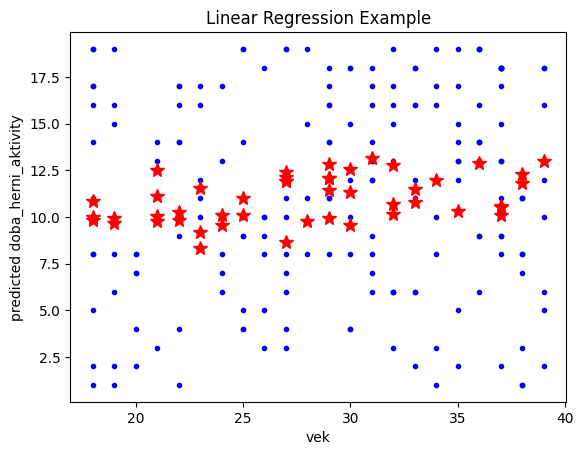

In [ ]:

# Plot the results for vek vs predicted doba_herni_aktivity
plt.plot(X_train['vek'], y_train, "b.")
plt.plot(X_test['vek'], y_pred, "r*", markersize=10)
plt.xlabel("vek")
plt.ylabel("predicted doba_herni_aktivity")
plt.title("Linear Regression Example")
plt.show()


## 4. Explanation of Important Output Metrics / Vysvětlení důležitých metrik kvality výstupu

**R2 (Coefficient of Determination)**: Measure of explained variability.
**R2 (koeficient determinace)**: Míra vysvětlené variability.

**AIC (Akaike Information Criterion)**: Criterion for model selection.
**AIC (Akaike Information Criterion)**: Kritérium pro výběr modelu.

**Accuracy, Precision, Recall, F1-score**: Metrics for classification models.
**Accuracy, Precision, Recall, F1-score**: Metriky pro klasifikační modely.



- **R2 (Coefficient of Determination)**: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates perfect prediction.
- **AIC (Akaike Information Criterion)**: AIC is used to compare different models and select the best one. It considers the goodness of fit and the complexity of the model. Lower AIC values indicate better models.
- **Accuracy**: The ratio of correctly predicted instances to the total instances. It is used in classification models.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It is used in classification models.
- **Recall**: The ratio of correctly predicted positive observations to all the observations in the actual class. It is used in classification models.
- **F1-score**: The weighted average of Precision and Recall. It is used in classification models and is useful when the class distribution is imbalanced.

**CZ:** 
- **R2 (koeficient determinace)**: Tato metrika měří podíl rozptylu závislé proměnné, který je predikovatelný z nezávislých proměnných. Pohybuje se od 0 do 1, kde 1 znamená dokonalou predikci.
- **AIC (Akaike Information Criterion)**: AIC se používá k porovnání různých modelů a výběru nejlepšího. Zohledňuje kvalitu fitu a složitost modelu. Nižší hodnoty AIC indikují lepší modely.
- **Accuracy (přesnost)**: Poměr správně predikovaných instancí k celkovému počtu instancí. Používá se v klasifikačních modelech.
- **Precision (přesnost)**: Poměr správně predikovaných pozitivních pozorování k celkovému počtu predikovaných pozitivních. Používá se v klasifikačních modelech.
- **Recall (citlivost)**: Poměr správně predikovaných pozitivních pozorování ke všem pozorováním ve skutečné třídě. Používá se v klasifikačních modelech.
- **F1-score**: Vážený průměr Precision a Recall. Používá se v klasifikačních modelech a je užitečný, když je rozdělení tříd nevyvážené.




## 5. The Eternal Battle - Tuning Model Accuracy (Bias) and Variance / Věčný souboj - Ladění přesnost modelu (bias) a rozptylu (variance)

**Bias-Variance Tradeoff**: Explanation and practical examples.
**Bias-Variance Tradeoff**: Vysvětlení a praktické příklady.

- **Bias-Variance Tradeoff**: This concept explains the tradeoff between the accuracy of the model (bias) and the variability of the model predictions (variance). A model with high bias oversimplifies the problem and may miss relevant relations between features and target outputs. A model with high variance overfits the training data and may not generalize well to unseen data. The goal is to find a balance between bias and variance to achieve optimal model performance.
- **Bias-Variance Tradeoff**: Tento koncept vysvětluje kompromis mezi přesností modelu (bias) a variabilitou predikcí modelu (variance). Model s vysokým biasem zjednodušuje problém a může přehlížet relevantní vztahy mezi vlastnostmi a cílovými výstupy. Model s vysokou variabilitou přetrénuje trénovací data a nemusí dobře generalizovat na neviděná data. Cílem je najít rovnováhu mezi biasem a variabilitou pro dosažení optimálního výkonu modelu.

**Cross-Validation**: Methods for model validation.
**Křížová validace**: Metody pro ověření modelu.

- **Cross-Validation**: Cross-validation is a technique used to assess the generalizability of a model. It involves partitioning the data into subsets, training the model on some subsets, and validating it on the remaining subsets. Common methods include k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validation.
- **Křížová validace**: Křížová validace je technika používaná k posouzení generalizovatelnosti modelu. Zahrnuje rozdělení dat na podmnožiny, trénování modelu na některých podmnožinách a validaci na zbývajících podmnožinách. Mezi běžné metody patří k-fold křížová validace, leave-one-out křížová validace a stratifikovaná křížová validace.




https://mlu-explain.github.io/bias-variance/

https://towardsdatascience.com/machine-learning-bias-variance-tradeoff-and-regularization-94846f945131/





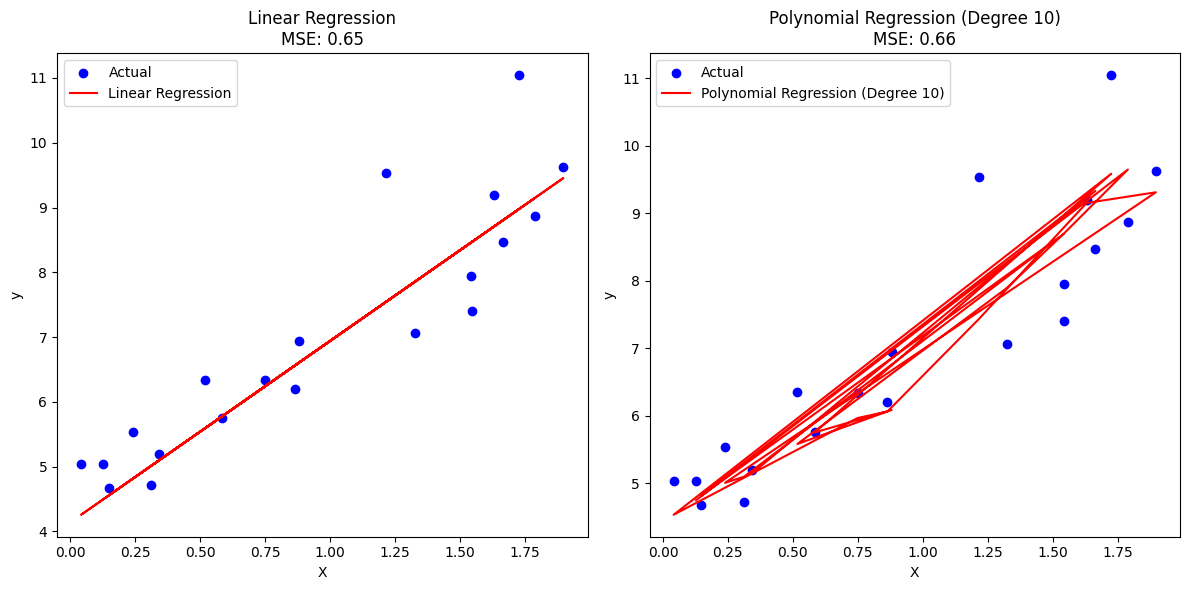

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Fit polynomial regression model (degree 10)
poly_features = PolynomialFeatures(degree=10)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Calculate mean squared error
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lin, color='red', label='Linear Regression')
plt.title(f'Linear Regression\nMSE: {mse_lin:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_poly, color='red', label='Polynomial Regression (Degree 10)')
plt.title(f'Polynomial Regression (Degree 10)\nMSE: {mse_poly:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()



## 6. References to Suitable Data Sources and Available Articles and Videos / Odkazy na vhodné zdroje dat a dostupné články a videa

**Data Sources**: Databases and online sources for obtaining data.
**Zdroje dat**: Databáze a online zdroje pro získání dat.

**Articles and Videos**: Recommended materials for further study.
**Články a videa**: Doporučené materiály pro další studium.

https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
https://mlu-explain.github.io/bias-variance/


